In [1]:
from picamera2 import Picamera2
from libcamera import Transform

picam2 = Picamera2()
config = picam2.create_video_configuration(
                        main={"size":(320,240)}, 
                        transform=Transform(hflip=True, vflip=True))
picam2.configure(config)
picam2.start() 

[0:09:14.387057360] [3193]  INFO Camera camera_manager.cpp:325 libcamera v0.3.2+101-34f4e38a
[0:09:14.409219940] [3209]  INFO RPI pisp.cpp:695 libpisp version v1.0.7 28196ed6edcf 09-01-2025 (16:10:56)
[0:09:14.420347749] [3209]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/ov5647@36 to CFE device /dev/media0 and ISP device /dev/media1 using PiSP variant BCM2712_C0
[0:09:14.424178765] [3193]  WARN V4L2 v4l2_pixelformat.cpp:346 Unsupported V4L2 pixel format RPBP
[0:09:14.424901487] [3193]  INFO Camera camera.cpp:1197 configuring streams: (0) 320x240-XBGR8888 (1) 640x480-GRBG_PISP_COMP1
[0:09:14.425032061] [3209]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/ov5647@36 - Selected sensor format: 640x480-SGRBG10_1X10 - Selected CFE format: 640x480-PC1G


In [2]:
from IPython.display import Image, clear_output, display
import cv2

def display_image(frame):
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=500))

In [3]:
import time

def play_cam(play_time=5):
    start_time = time.time()

    while time.time() - start_time < play_time:
        frame = picam2.capture_array()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display_image(frame)
        time.sleep(1/30)

    print("Done!")

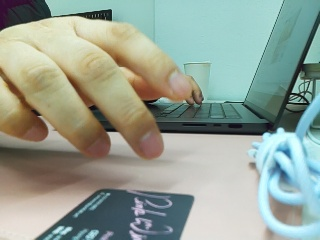

Done!


In [4]:
play_cam(play_time=3)

In [5]:
picam2.stop()